# Natural Language Processing using TDA

### Load dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import k_nerve as kn

## Load Data

In [2]:
df = pd.read_csv("spam.csv", encoding = 'latin-1') 
# Data Source: UCI machine learning repository-- SMS Spam Collection dataset

In [3]:
data = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})
data['label_numeric'] = list(map(lambda x: 1 if x == "spam" else 0, data["label"]))
# make numerical labels
data = data.sample(n = 1000) # random sample 
data.label.value_counts()

ham     846
spam    154
Name: label, dtype: int64

## Text to vect transformation

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
data_vect = count_vect.fit_transform(data.text)
#test_set_vect = count_vect.transform(test_set.text)


In [5]:
data_ar = np.array(csr_matrix.todense(data_vect))

In [ ]:
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data_ar)

## PCA

In [6]:
from sklearn.decomposition import PCA, KernelPCA

In [7]:
pca = PCA(n_components = 2)
kpca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 1)

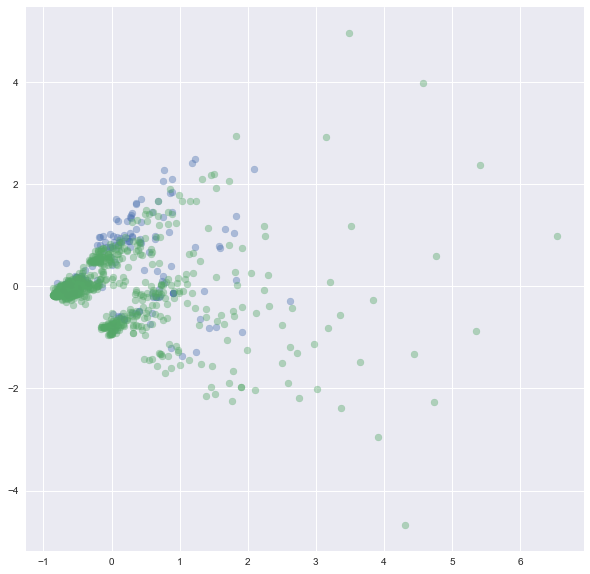

In [8]:
projected_data = pca.fit_transform(data_ar)

df_proj = pd.DataFrame({"x1": projected_data[:,0], "x2":projected_data[:,1] , "label": data.label.tolist()})

fig = plt.figure(figsize = (10,10))
labels = list(set(data.label.values))

for i in range(len(labels)):
    df_proj_i = df_proj[df_proj["label"] == labels[i]]
    X,Y = df_proj_i["x1"].values.tolist(), df_proj_i["x2"].values.tolist() 
    plt.scatter(X,Y, alpha = 0.4)
plt.show()

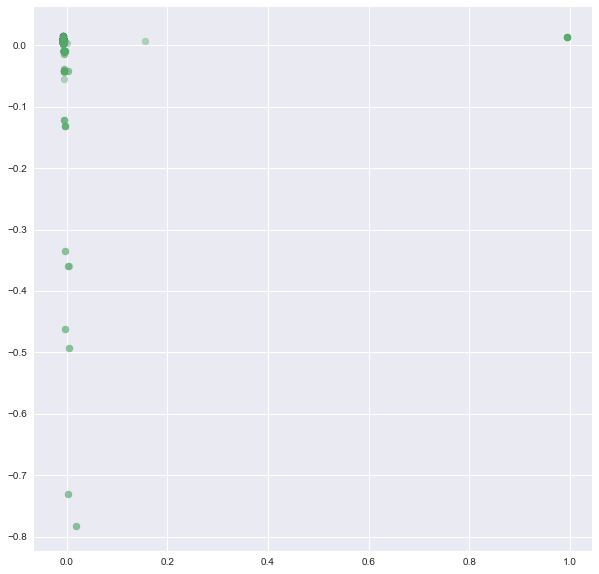

In [9]:
projected_data = kpca.fit_transform(data_ar)

df_proj = pd.DataFrame({"x1": projected_data[:,0], "x2":projected_data[:,1] , "label": data.label.tolist()})

fig = plt.figure(figsize = (10,10))
labels = list(set(data.label.values))

for i in range(len(labels)):
    df_proj_i = df_proj[df_proj["label"] == labels[i]]
    X,Y = df_proj_i["x1"].values.tolist(), df_proj_i["x2"].values.tolist() 
    plt.scatter(X,Y, alpha = 0.4)
plt.show()

# TDA

In [10]:
#data_kn = KernelPCA(n_components = 10, kernel = 'rbf', gamma = 0.1).fit_transform(data).tolist()
data_kn = PCA(n_components = 10).fit_transform(data_ar).tolist()
labels_kn = data.label_numeric.values.tolist()

In [11]:
KN = kn.k_Nerve(n_components = 2, covering_size = 225, overlap = 0.65)
kKN = kn.k_Nerve(n_components = 2, kernel = 'rbf', gamma = 1, covering_size = 225, overlap = 0.75)

In [ ]:
KN.draw(data_kn,labels_kn)

![alt text](spam_TDA/spam_2_225_065.png)

In [12]:
kKN.draw(data_kn, labels_kn)

![alt text](spam_TDA/spam_rbf1_2_225_075.png)